# What is the Curse of Dimensionality?

It refers to the difficulties a machine learning algorithm faces when working with data in the higher dimensions(features), that did not exist in the lower dimensions.

This means, that you are required to have an `Optimal Set` of features to predict better accuracy of the model.

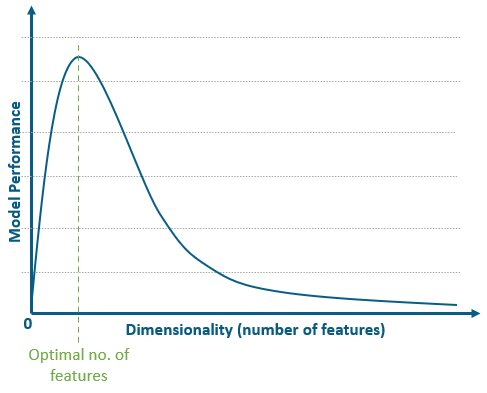

With the increase in the data dimensions, your model –

* would also increase in `Computation Cost`
* would decrease the `Performance of the Model`
* would become increasingly dependent on the training data for production.

This leads to overfitting of the model, so even though the model performs really well on training data, it may fails on test data.


# Dimensionality Reduction 

It is a process of reducing the dimension of your data to a few principal features in the original dataset, to remove the curse of dimensionality.

### Why is Dimensionality Reduction necessary?

* **Avoids overfitting** – the lesser assumptions a model makes, the simpler it will be.
* **Easier computation** – the lesser the dimensions, the faster the model trains.
* **Improved model performance** – removes redundant features and noise, lesser misleading data improves model accuracy.
* **Lower dimensional data** - requires less storage space.

### How is Dimensionality Reduction done?

These techniques are divided into two broad categories for dimensionality reduction depending on the problem and the data:

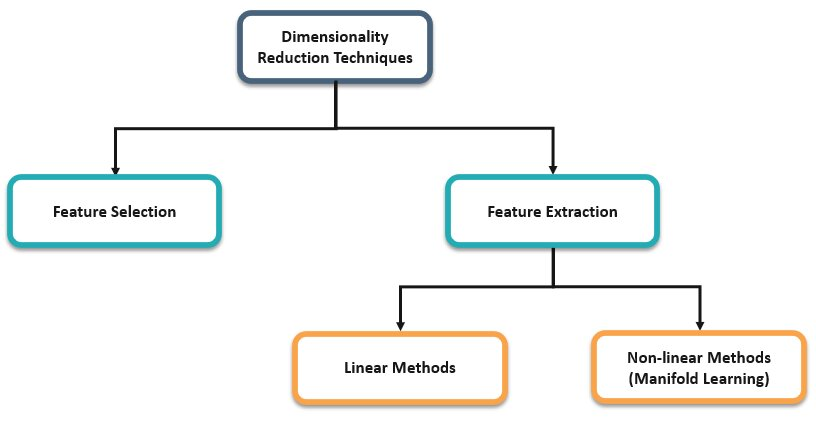

a. **Feature Selection**: By only keeping the most relevant variables from the original dataset

i. Correlation

ii. Forward Selection

iii. Backward Elimination

iv. Select K Best

v. Missing value Ratio


b. **Feature Extraction**: By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables.

i. PCA(Principal Component Analysis)

ii. LDA(Linear Discriminant Analysis)

iii. t-SNE (t-distributed Stochastic Neighbor Embedding) 



# PCA(Principal Component Analysis)

is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.

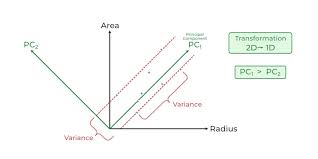

It tends to find the direction of maximum variation (spread) in data. PCA is more useful when dealing with 3 or higher-dimensional data.

PCA can be used for anomaly detection and outlier detection because they will not be part of the data as it would be considered noise by PCA.

Moreover, Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. 



# Step-By-Step Explanation of PCA (Principal Component Analysis)

### Step 1: Standardization

First, we need to standardize our dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.



Here,

* **mu**   -     is the mean of independent features  

* **sigma**   -  is the standard deviation of independent features  

### Step2: Covariance Matrix Computation

Covariance is a statistical measure that quantifies how changes in one variable correspond to changes in another. To find the covariance we can use the formula:

      

Covariance can be positive, negative, or zero. 

* Positive: As the x1 increases x2 also increases.
* Negative: As the x1 increases x2 also decreases.
* Zeros: No direct relation

### Covariance Matrix

In a covariance matrix, each element represents the covariance between two variables. The main diagonal of the matrix contains the variances of individual variables.

### Step 3: Compute Eigenvalues and Eigenvectors of Covariance Matrix to Identify Principal Components

Let A be a square nXn matrix and X be a non-zero vector for which 

   

for some scalar values \lambda, then \lambda is known as the eigenvalue of matrix A and X is known as the eigenvector of matrix A for the corresponding eigenvalue.

From the above equation, we can find the eigenvalues \lambda, and therefore corresponding eigenvector can be found using the equation AX = \lambda X.


# Implementing PCA for Dimensionality Reduction

### Problem Statement:

A large number of input dimensions can cause a model to slow down during execution. So, we perform Principal Component Analysis (PCA) on the model to speed up the fitting of the ML algorithm.

PCA projects data in the direction of increasing variance. The features having the highest variance are the principal components. Let’s see how to implement PCA using Python.



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
# Setting a seed for reproducibility
np.random.seed(23)

# Generate data for class 1
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

# Create a DataFrame for class 1
df_class1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df_class1['target'] = 1

# Generate data for class 2
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# Create a DataFrame for class 2
df_class2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df_class2['target'] = 0

# Concatenate both classes into a single DataFrame
df = pd.concat([df_class1, df_class2], ignore_index=True)

# Randomly sample 40 rows from the combined DataFrame
df = df.sample(40, random_state=23)

# Display the resulting DataFrame
df.head()

,feature1,feature2,feature3,target
18,-0.331617,-1.632386,0.619114,1
23,1.010229,1.437830,2.327788,0
8,0.241106,-0.952510,-0.136267,1
22,1.676860,4.187503,-0.080565,0
33,2.823378,-0.332863,2.637391,0


In [3]:
# 3D Plot of data
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))

fig.show()

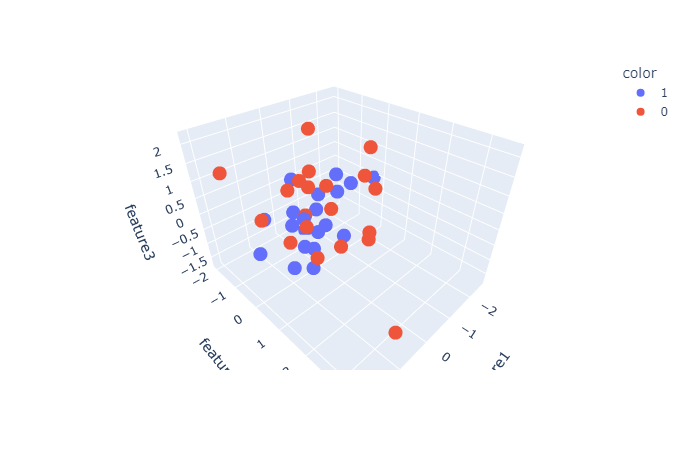


# Step 1 - Apply standard scaling


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])


# Step 2 - Find Covariance Matrix

In [5]:
# Creating a Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


# Step 3 - Finding Eigen Vectors and Eigen Values for the Covariance-matrix

In [6]:
# Using Linear Algebra for extrating Eigen Vectores and Values
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
     

In [7]:
# Checking Eigen Vectors
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [8]:
# Checking Eigen Values
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

# Step 4 – Concatenating the Principal Components with the target variable

In [9]:
eigen_vectors = eigen_vectors.T  # Transpose for easier indexing

In [10]:
# Step 4: Sort eigenvalues and choose top k eigenvectors
sorted_indices = np.argsort(eigen_values)[::-1]
k = 2  # Choose top 2 eigenvectors for a 2-dimensional subspace
top_eigen_indices = sorted_indices[:k]

In [11]:
# Step 5: Construct the projection matrix W
projection_matrix = eigen_vectors[top_eigen_indices]

In [12]:
# Step 6: Transform the original data
transformed_data = np.dot(df.iloc[:, 0:3], projection_matrix.T)
new_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(k)])
new_df['target'] = df['target'].values

In [13]:
# Display the transformed DataFrame
new_df.head()

,PC1,PC2,target
0,1.694055,0.454694,1
1,-1.654764,0.691473,0
2,1.349328,-0.377883,1
3,-2.572050,-1.265530,0
4,-1.544065,-0.194608,0


# Step 5 – Visualizing the 2D Projection

In [14]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.show()

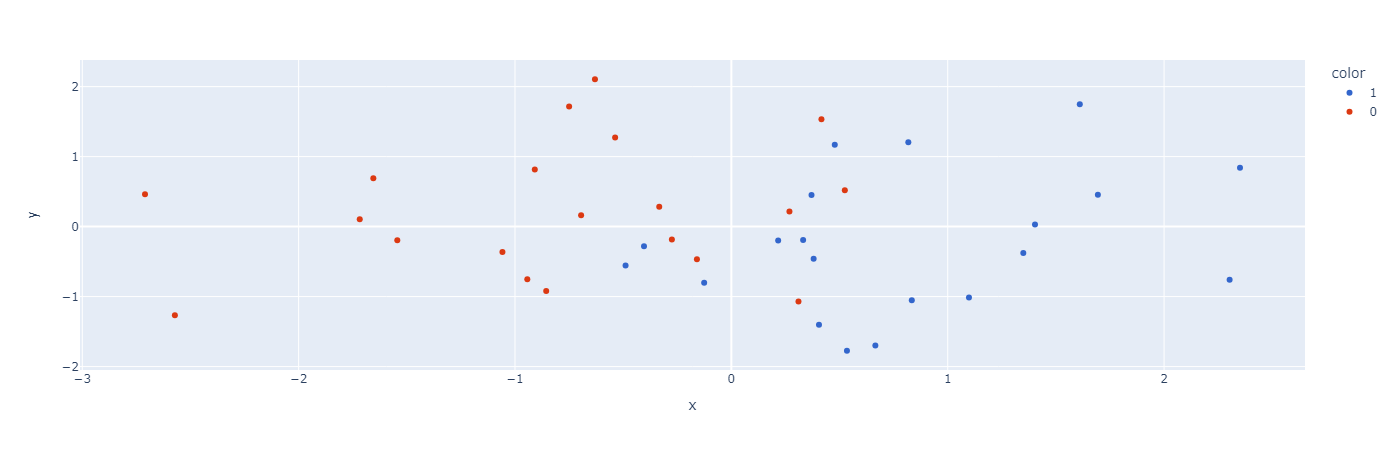

Hence dataset is successfully transformed.

# Validating the Manual implementation using sklearn's PCA

In [15]:
# Assigning the DataFrame to pca_data
pca_data = df

In [33]:
pca_data["target"]

18    1
23    0
8     1
22    0
33    0
32    0
10    1
3     1
14    1
30    0
28    0
20    0
36    0
4     1
7     1
24    0
1     1
15    1
37    0
16    1
29    0
0     1
5     1
21    0
11    1
2     1
17    1
35    0
13    1
34    0
6     1
39    0
25    0
26    0
27    0
12    1
31    0
9     1
38    0
19    1
Name: target, dtype: int64

In [16]:
from sklearn.decomposition import PCA

In [17]:
# Standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data.iloc[:, 0:3])

# PCA using scikit-learn
pca_sklearn = PCA(n_components=2)
pca_result_sklearn = pca_sklearn.fit_transform(scaled_data)

In [34]:
pc_df = pd.DataFrame(data=pca_result_sklearn, columns=["PC1", "PC2"])
pc_df["target"] = pca_data["target"].values

In [37]:
pc_df.head()


,PC1,PC2,target
0,-1.694055,0.454694,1
1,1.654764,0.691473,0
2,-1.349328,-0.377883,1
3,2.572050,-1.265530,0
4,1.544065,-0.194608,0


### Assertion Test for Validation of eigenvalues



In [18]:
# Manually calculated and eigenvalues
manual_eigenvalues = eigen_values

# Eigenvalues using scikit-learn
sklearn_eigenvalues = pca_sklearn.explained_variance_

In [19]:
np.testing.assert_allclose(manual_eigenvalues[:2], sklearn_eigenvalues, rtol=1e-5, atol=1e-8)

In [20]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [21]:
pca_sklearn.explained_variance_

array([1.3536065 , 0.94557084])

### Assertion Test for Validation of eigenvectors

In [22]:
# Manually calculated eigenvectors
manual_eigenvectors = projection_matrix

# Eigenvectors using scikit-learn
sklearn_eigenvectors = pca_sklearn.components_

In [23]:
sklearn_eigenvalues *= -1

In [26]:
sklearn_eigenvectors[0] *= -1


In [27]:
np.testing.assert_allclose(manual_eigenvectors, sklearn_eigenvectors, rtol=1e-5, atol=1e-8)


In [28]:
print("Manual Eigenvectors:\n", manual_eigenvectors)

print("\nSklearn Eigenvectors:\n", sklearn_eigenvectors)

Manual Eigenvectors:
 [[-0.53875915 -0.65608325 -0.52848211]
 [-0.69363291 -0.01057596  0.72025103]]

Sklearn Eigenvectors:
 [[-0.53875915 -0.65608325 -0.52848211]
 [-0.69363291 -0.01057596  0.72025103]]


### Disadvantages of PCA:

-- PCA does not guarantee class separability which is why it is an unsupervised algorithm. In other words, PCA does not know whether the problem which we are solving is a regression or classification task. 

-- PCA reduces interpretability because it transforms original features into principal components that do not retain the original feature names.

In a nutshell, PCA has limitations while dealing with non-linear data patterns/ boundaries. It is more effective for linear relationships and may not perform well in datasets with non-linear structures.

Definitely depending upon the nature of data you are working with you have to decide which Feature Extraction tool you must use.

Such as, for non-linear patterns, you might consider using `kernel PCA` or non-linear dimensionality reduction techniques.

The scope of this post was to make beginners understand and get familiar with the 'Curse of Dimensionality', and PCA the most basic building block of Feature Extraction.

##### **Note**:

I have performed this Step-by-Step PCA implementation for understanding purposes. 

Use `scikit-learn` to implement PCA in Python:

In scikit-learn, the `fit_transform` method performs both fitting the PCA model on the data and transforming the data to the new subspace with reduced dimensions.


#####  **Additional**

**PCA vs PCR**

Combining PCA with Regularization for Linear Regression Models might require hyperparameters tuning for both PCA and regularization, which can cause challenges for the interpretability of the resulting model.

Generally, PCR (Principal Component Regression) is used which directly incorporates principal components into the regression analysis, simplifying the modeling process. It automatically addresses multicollinearity by using the first few principal components that are sufficient to capture most of the variation in the predictors as well as the relationship with the target variable.

But it's not a feature selection method and it is more related to ridge regression.




-- *Use Google to explore more if you're interested.*
